<a href="https://colab.research.google.com/github/cloudynirvana/TNBC-Metabolic-Strain-MOD/blob/main/tnbc_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

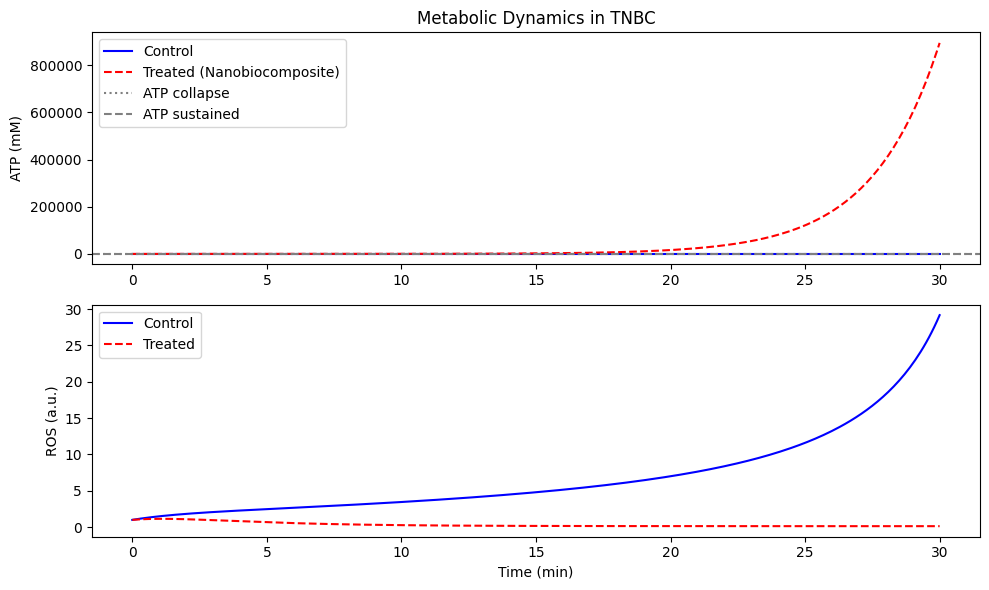

G_tip Control: 0.854, Treated: 0.333


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# TNBC metabolic strain ODE system
def tnbc_system(y, t, k_glyc, u, s, g, h, r, i_glyc, d, Nano_DOX, Nano_ROS):
    A, R_os, G_lc = y
    dA_dt = k_glyc * G_lc - s * R_os * A + r * (Nano_DOX + Nano_ROS) * A
    dR_os_dt = g * k_glyc * G_lc + h * R_os**2 - d * Nano_ROS * R_os
    dG_lc_dt = u - k_glyc * G_lc - i_glyc * Nano_DOX
    return [dA_dt, dR_os_dt, dG_lc_dt]

# Parameters
params_control = {'k_glyc': 0.6, 'u': 0.5, 's': 0.15, 'g': 0.2, 'h': 0.01, 'r': 0.1, 'i_glyc': 0.3, 'd': 0.15, 'Nano_DOX': 0, 'Nano_ROS': 0}
params_treated = params_control.copy()
params_treated.update({'Nano_DOX': 1, 'Nano_ROS': 2, 'r': 0.14})

# Initial conditions and time points
y0 = [10.0, 1.0, 5.0]  # [ATP, ROS, Glucose] in mM
t = np.linspace(0, 30, 300)

# Run simulations
sol_control = odeint(tnbc_system, y0, t, args=tuple(params_control.values()))
sol_treated = odeint(tnbc_system, y0, t, args=tuple(params_treated.values()))

# Extract results
A_control, R_os_control, G_lc_control = sol_control.T
A_treated, R_os_treated, G_lc_treated = sol_treated.T

# Plot and save figure
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, A_control, 'b-', label='Control')
plt.plot(t, A_treated, 'r--', label='Treated (Nanobiocomposite)')
plt.axhline(y=2.0, color='gray', linestyle=':', label='ATP collapse')
plt.axhline(y=5.43, color='gray', linestyle='--', label='ATP sustained')
plt.ylabel('ATP (mM)')
plt.legend()
plt.title('Metabolic Dynamics in TNBC')

plt.subplot(2, 1, 2)
plt.plot(t, R_os_control, 'b-', label='Control')
plt.plot(t, R_os_treated, 'r--', label='Treated')
plt.xlabel('Time (min)')
plt.ylabel('ROS (a.u.)')
plt.legend()
plt.tight_layout()
plt.savefig('figure1.png', dpi=300)  # Saves to Colab’s temporary storage
plt.show()

# Calculate G_tip
def find_G_tip(sol):
    A, _, G_lc = sol.T
    idx = np.where(A < 2.0)[0]
    return G_lc[idx[0]] if len(idx) > 0 else G_lc[-1]

G_tip_control = find_G_tip(sol_control)
G_tip_treated = find_G_tip(sol_treated)
print(f"G_tip Control: {G_tip_control:.3f}, Treated: {G_tip_treated:.3f}")